In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
import pprint
%matplotlib inline

import os
print(os.listdir("../input"))

['Colo - Copy (2).csv', 'Colo.csv', 'my_model', 'my_model.h5', 'Preciption_(2020)', 'Preciption_(2020).h5', 'Precption(2).csv', 'Precption(3).csv', 'Precption(4).csv', 'Precption.csv']


In [35]:
df = pd.read_csv('../input/Colo - Copy (2).csv')

In [36]:
df

,Date,Precip MM
0,1/1/2009,0
1,2/1/2009,0
2,3/1/2009,0
3,4/1/2009,0
4,5/1/2009,0
...,...,...
4012,27/12/2019,0
4013,28/12/2019,0
4014,29/12/2019,0
4015,30/12/2019,0


In [37]:
df.Date=pd.to_datetime(df.Date)
df=df.set_index('Date')

In [38]:
df

,Precip MM
Date,
2009-01-01,0
2009-02-01,0
2009-03-01,0
2009-04-01,0
2009-05-01,0
...,...
2019-12-27,0
2019-12-28,0
2019-12-29,0


In [39]:
TestData = df.tail(365)

In [40]:
Df_Total = pd.concat((df[["Precip MM"]], TestData[["Precip MM"]]), axis=0)

In [41]:
Df_Total.shape

(4382, 1)

In [42]:
inputs = Df_Total[len(Df_Total) - len(TestData) - 60:].values
inputs.shape

(425, 1)

In [43]:
from pandas.tseries.offsets import DateOffset
add_dates = [df.index[-1] + DateOffset(days=x) for x in range(0,366)]
future_dates = pd.DataFrame(index=add_dates[1:],columns=df.columns)

In [44]:
future_dates.tail(365)

,Precip MM
2020-01-01,NaN
2020-01-02,NaN
2020-01-03,NaN
2020-01-04,NaN
2020-01-05,NaN
...,...
2020-12-26,NaN
2020-12-27,NaN
2020-12-28,NaN
2020-12-29,NaN


In [45]:
df.shape

(4017, 1)

In [46]:
Training_Set = df

In [47]:
Training_Set = Training_Set.values
sc = MinMaxScaler(feature_range=(0, 1))
Train = sc.fit_transform(Training_Set)

In [48]:
Train.shape

(4017, 1)

In [49]:
X_Train = []
Y_Train = []

# Range should be fromm 60 Values to END
for i in range(60, Train.shape[0]):
   
    # X_Train 0-59
    X_Train.append(Train[i-60:i])
   
    # Y Would be 60 th Value based on past 60 Values
    Y_Train.append(Train[i])

# Convert into Numpy Array
X_Train = np.array(X_Train)
Y_Train = np.array(Y_Train)

print(X_Train.shape)
print(Y_Train.shape)

(3957, 60, 1)
(3957, 1)


In [50]:
X_Train = np.reshape(X_Train, newshape=(X_Train.shape[0], X_Train.shape[1], 1))
X_Train.shape

(3957, 60, 1)

# Model

In [51]:
regressor = Sequential()

# Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 150, return_sequences = True,input_shape = (X_Train.shape[1], 1)))
regressor.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 150, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 150, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 150))
regressor.add(Dropout(0.2))

# Adding the output layer
regressor.add(Dense(units = 1))

In [52]:
regressor.summary()
# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_5 (LSTM)                (None, 60, 150)           91200     
_________________________________________________________________
dropout_5 (Dropout)          (None, 60, 150)           0         
_________________________________________________________________
lstm_6 (LSTM)                (None, 60, 150)           180600    
_________________________________________________________________
dropout_6 (Dropout)          (None, 60, 150)           0         
_________________________________________________________________
lstm_7 (LSTM)                (None, 60, 150)           180600    
_________________________________________________________________
dropout_7 (Dropout)          (None, 60, 150)           0         
_________________________________________________________________
lstm_8 (LSTM)                (None, 150)              

In [53]:
regressor.fit(X_Train,Y_Train, epochs = 100, batch_size = 6)

Epoch 1/100
3957/3957 [==============================] - 153s 39ms/step - loss: 0.0051
Epoch 2/100
3957/3957 [==============================] - 160s 40ms/step - loss: 0.0042
Epoch 3/100
3957/3957 [==============================] - 149s 38ms/step - loss: 0.0039
Epoch 4/100
3957/3957 [==============================] - 151s 38ms/step - loss: 0.0036
Epoch 5/100
3957/3957 [==============================] - 150s 38ms/step - loss: 0.0036
Epoch 6/100
3957/3957 [==============================] - 153s 39ms/step - loss: 0.0035
Epoch 7/100
3957/3957 [==============================] - 151s 38ms/step - loss: 0.0034
Epoch 8/100
3957/3957 [==============================] - 151s 38ms/step - loss: 0.0035
Epoch 9/100
3957/3957 [==============================] - 150s 38ms/step - loss: 0.0034
Epoch 10/100
3957/3957 [==============================] - 150s 38ms/step - loss: 0.0034
Epoch 11/100
3957/3957 [==============================] - 152s 38ms/step - loss: 0.0034
Epoch 12/100
3957/3957 [=================

3957/3957 [==============================] - 146s 37ms/step - loss: 0.0018
Epoch 95/100
3957/3957 [==============================] - 148s 37ms/step - loss: 0.0019
Epoch 96/100
3957/3957 [==============================] - 148s 37ms/step - loss: 0.0019
Epoch 97/100
3957/3957 [==============================] - 150s 38ms/step - loss: 0.0018
Epoch 98/100
3957/3957 [==============================] - 149s 38ms/step - loss: 0.0019
Epoch 99/100
3957/3957 [==============================] - 149s 38ms/step - loss: 0.0018
Epoch 100/100
3957/3957 [==============================] - 148s 37ms/step - loss: 0.0018


In [54]:
future_dates.shape

(365, 1)

In [55]:
inputs = Df_Total[len(Df_Total) - len(TestData) - 60:].values

# We need to Reshape
inputs = inputs.reshape(-1,1)

# Normalize the Dataset
inputs = sc.transform(inputs)

X_test = []
for i in range(60, 425):
    X_test.append(inputs[i-60:i])
       
# Convert into Numpy Array
X_test = np.array(X_test)

# Reshape before Passing to Network
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Pass to Model
predicted_Precip = regressor.predict(X_test)

# Do inverse Transformation to get Values
predicted_Precip = sc.inverse_transform(predicted_Precip)

In [56]:
True_Precip = 0
Predicted_Precip  = predicted_Precip
dates = TestData.index.to_list()

In [57]:
#df_predict = pd.DataFrame(scaler.inverse_transform(pred_list), index=future_dates[-n_input:].index, columns=['Predictions'])
Machine_Df2 = pd.DataFrame(data={
    "Date":future_dates.index.to_list(),
    "TruePrecip": True_Precip,
    "PredictedPrecip":[x[0] for x in predicted_Precip]
})

In [58]:
Machine_Df2

,Date,TruePrecip,PredictedPrecip
0,2020-01-01,0,8.833099
1,2020-01-02,0,3.068868
2,2020-01-03,0,2.917714
3,2020-01-04,0,3.289912
4,2020-01-05,0,2.833853
...,...,...,...
360,2020-12-26,0,-0.018300
361,2020-12-27,0,-0.602514
362,2020-12-28,0,0.590555
363,2020-12-29,0,0.738401


C:\Users\Bihandu\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


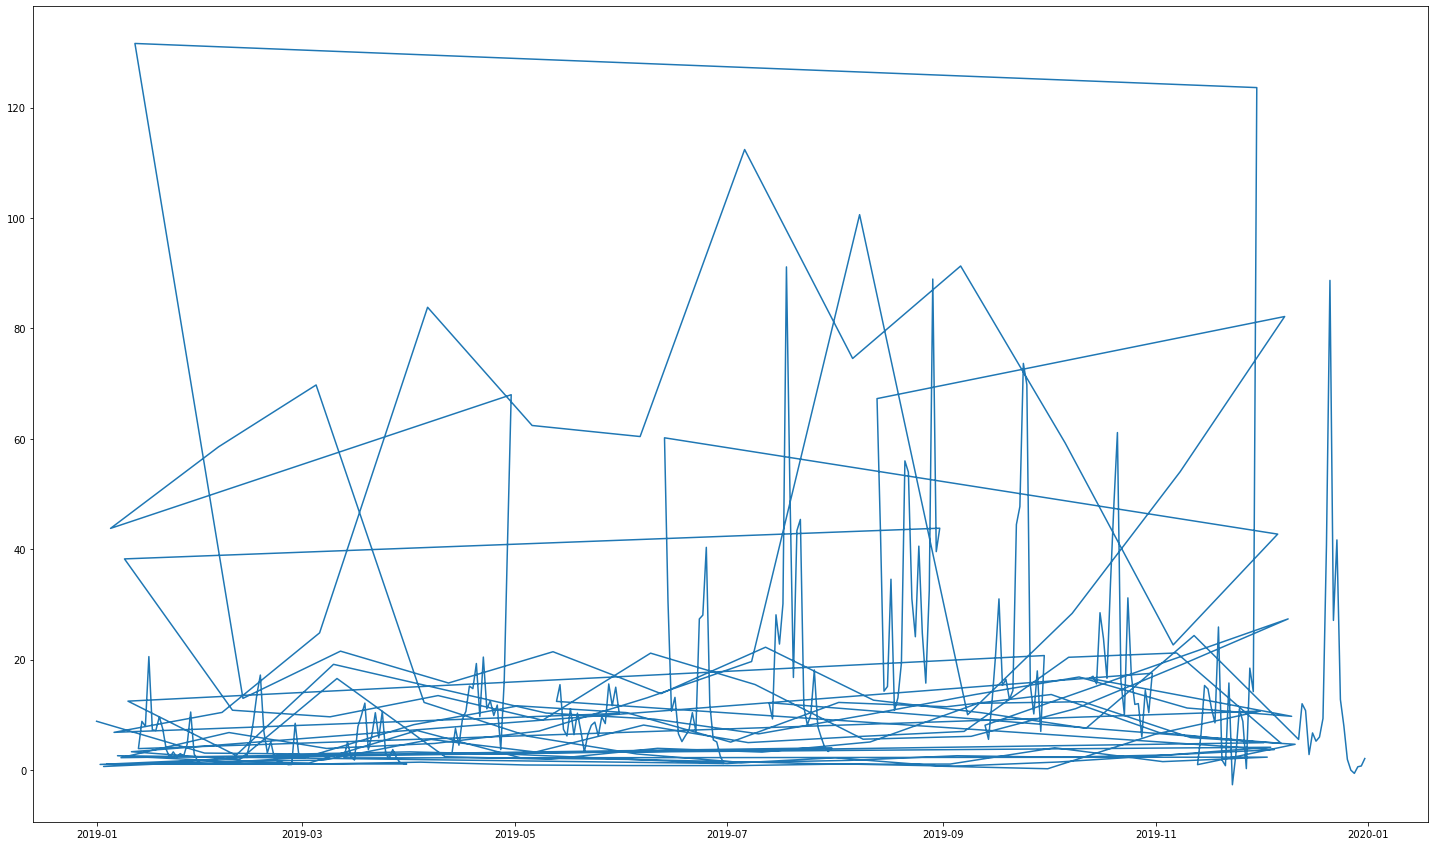

In [65]:
plt.figure(figsize=(25,15))
plt.plot(TestData.index, Predicted_Precip)
plt.show()

In [62]:
Machine_Df2.to_csv("../input/Precption(4).csv")

In [59]:
regressor.save('../input/Preciption_(2020)') 

In [60]:
regressor.save('../input/Preciption_(2020).h5') 